<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
import pandas as pd

df = pd.read_csv("/Users/terrenceam22/Documents/Build/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv")
df.head(5)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
# Looking at messy 'description' column of job listings csv
text = df['description'].head()
text

0    b"<div><div>Job Requirements:</div><ul><li><p>...
1    b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2    b'<div><p>As a Data Scientist you will be work...
3    b'<div class="jobsearch-JobMetadataHeader icl-...
4    b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
Name: description, dtype: object

In [26]:
from bs4 import BeautifulSoup
import requests
# Cleaning messy column

df['description'] = df['description'].apply(lambda s: " ".join(BeautifulSoup(s, "html.parser").stripped_strings).replace("\\n", " "))
df.head()

,Unnamed: 0,description,title
0,0,"b"" Job Requirements: Conceptual understanding...",Data scientist
1,1,"b' Job Description As a Data Scientist 1, ...",Data Scientist I
2,2,b' As a Data Scientist you will be working on ...,Data Scientist - Entry Level
3,3,"b' $4,969 - $6,756 a month Contract Under the ...",Data Scientist
4,4,b' Location: USA \xe2\x80\x93 multiple locatio...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [29]:
##### Your Code Here #####
# Tokenizing list and using regular expressions and appending them to dataset
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
spacy.load("en_core_web_lg")

nlp = English()
tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", '', t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))
df['tokens'] = tokens


In [31]:
df['tokens'].head()

0    b job requirements conceptual understanding ma...
1    b job description data scientist 1 help build ...
2    b data scientist working consulting business r...
3    b 4969 6756 month contract general supervision...
4    b location usa xe2x80x93 multiple locations 2 ...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [32]:
##### Your Code Here #####
# Using count vectorizer to get word count
# Imported library in first cell
# fitting and transforming tokenized data
vect = CountVectorizer()
dtm = vect.fit_transform(df['tokens'])

In [35]:
print(dtm)
# Looking at type of data
type(dtm.todense())

  (0, 4915)	1
  (0, 7436)	1
  (0, 1947)	1
  (0, 9174)	1
  (0, 5345)	1
  (0, 5114)	1
  (0, 5725)	1
  (0, 5207)	2
  (0, 5862)	1
  (0, 1029)	1
  (0, 4998)	1
  (0, 8630)	1
  (0, 750)	1
  (0, 5221)	1
  (0, 5281)	1
  (0, 7308)	1
  (0, 5938)	1
  (0, 7160)	1
  (0, 3695)	1
  (0, 2441)	1
  (0, 9049)	1
  (0, 5005)	1
  (0, 4112)	1
  (0, 3352)	2
  (0, 4776)	1
  :	:
  (425, 3072)	1
  (425, 2415)	1
  (425, 1140)	2
  (425, 4042)	1
  (425, 6103)	1
  (425, 7759)	1
  (425, 1519)	7
  (425, 7092)	1
  (425, 6832)	1
  (425, 7563)	1
  (425, 942)	1
  (425, 7467)	1
  (425, 5380)	1
  (425, 4865)	1
  (425, 7673)	1
  (425, 1933)	1
  (425, 6085)	1
  (425, 1920)	1
  (425, 4488)	1
  (425, 3647)	1
  (425, 8009)	1
  (425, 2808)	1
  (425, 5181)	1
  (425, 135)	1
  (425, 1520)	1


numpy.matrix

## 4) Visualize the most common word counts

In [36]:
##### Your Code Here #####
# Using count library to count common words 
# Then visualizing them
from collections import Counter

counts = Counter()
for row in df['tokens']:
    counts.update(row.split(" "))
print(counts.most_common(10))

[('data', 4278), ('experience', 1874), ('business', 1185), ('work', 1144), ('team', 963), ('science', 934), ('learning', 900), ('analytics', 719), ('skills', 686), ('machine', 683)]


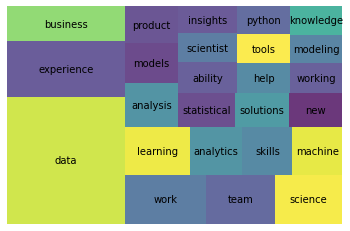

In [39]:
# Visualizing common words
# import squarify and matplotlib
import squarify
import matplotlib.pyplot as plt

cw = counts.most_common(25)
squarify.plot(sizes=[c for w, c in cw], label=[w for w, c in cw], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [40]:
# Feature maxtrix using scikit-learn feature extraction text
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [45]:
mx = vect.fit_transform(df['tokens'])
mx

<426x9819 sparse matrix of type '<class 'numpy.float64'>'
	with 93105 stored elements in Compressed Sparse Row format>

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [48]:
##### Your Code Here #####
# Description of job in Data Science

data_job = 'IT jobs have alot of exponential growth in the industry'

tokens = []
for doc in tokenizer.pipe([data_job], batch_size=700):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))
X_test = tokens
X_test = vect.transform(X_test)
X_test

<1x9819 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [51]:
# importing KNnearestneighbors
# Fitting matrix 
from sklearn.neighbors import NearestNeighbors

NN = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
NN.fit(matrix)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [53]:
_, indices = NN.kneighbors(X_test)
indices

array([[257, 191, 255,  30, 337]])

In [54]:
df.iloc[23]['description']
# Not perfect cleaning but alot better than first try.

"b' Motiion is a technology and data company for the food industry. We believe in transparency, diversity, merit and fostering a culture of accountability, personal impact and career growth.    As a member of the first product engineering team at Motiion you have will have a unique opportunity to turning previously scattered and inconsistently structured data into directly actionable food industry insights to reduce waste, increase freshness and much more.    You have a proven track record of reading data and making solid conclusions. You know both the art and science of analytics - now only do you know how to find answers in the data, you also know which questions should be asked in the first place and what data might could help us further bolster our conclusions. You love engaging with customers, learn about their challenges and then dive into the data to see how to solve them!    We are building a product engineering team with a breadth of combined experiences so that we can collabo

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 